In [81]:

import nltk
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
plt.style.use('fivethirtyeight')
nltk.download('punkt')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from scipy.special import softmax
from nltk import ne_chunk
import plotly.express as px

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nudou\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\nudou\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\nudou\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [82]:
data= pd.read_csv("Reviews Sentiment.csv")
data

,Id,NetworkService,Reviews
0,1,EE,"Connectivity, network strength, internet"
1,2,Giffgaff,Cheap bundles
2,3,EE,Easy to contact support. Easy to use app. Fair...
3,4,EE,Gifting data to family
4,5,EE,"Cost , sometimes singal goes off"
...,...,...,...
100,101,3network,Nothing that I'm aware of currently.
101,102,Vodafone,A bit more expensive
102,103,EE,Horrible data bundle
103,104,EE,"Long wait when you call,"


In [83]:
#creating a function to create the subjectivity and the polarity

#helps in telling how subjective and opinionated the text is
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#tells how positive or negative the review is
def getpolarity(text):
    return TextBlob(text). sentiment.polarity

data['Subjectivity']= data['Reviews'].apply(getSubjectivity)

data['Polarity']= data['Reviews'].apply(getpolarity)
data



,Id,NetworkService,Reviews,Subjectivity,Polarity
0,1,EE,"Connectivity, network strength, internet",0.000000,0.000000
1,2,Giffgaff,Cheap bundles,0.700000,0.400000
2,3,EE,Easy to contact support. Easy to use app. Fair...,0.855556,0.522222
3,4,EE,Gifting data to family,0.000000,0.000000
4,5,EE,"Cost , sometimes singal goes off",0.000000,0.000000
...,...,...,...,...,...
100,101,3network,Nothing that I'm aware of currently.,0.325000,0.125000
101,102,Vodafone,A bit more expensive,0.600000,0.000000
102,103,EE,Horrible data bundle,1.000000,-1.000000
103,104,EE,"Long wait when you call,",0.400000,-0.050000


In [84]:
#creating a function to compute the negative , positive and neutral string.

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

data['Analysis'] = data['Polarity'].apply(getAnalysis)
#showing the dataframe
data

,Id,NetworkService,Reviews,Subjectivity,Polarity,Analysis
0,1,EE,"Connectivity, network strength, internet",0.000000,0.000000,Neutral
1,2,Giffgaff,Cheap bundles,0.700000,0.400000,Positive
2,3,EE,Easy to contact support. Easy to use app. Fair...,0.855556,0.522222,Positive
3,4,EE,Gifting data to family,0.000000,0.000000,Neutral
4,5,EE,"Cost , sometimes singal goes off",0.000000,0.000000,Neutral
...,...,...,...,...,...,...
100,101,3network,Nothing that I'm aware of currently.,0.325000,0.125000,Positive
101,102,Vodafone,A bit more expensive,0.600000,0.000000,Neutral
102,103,EE,Horrible data bundle,1.000000,-1.000000,Negative
103,104,EE,"Long wait when you call,",0.400000,-0.050000,Negative


Predicting Sentiment Analysis

In [85]:
#creating a new variable for my data
columns= ['Id','NetworkService', 'Reviews', 'Subjectivity', 'Polarity', 'Analysis']
new_data = data[(columns)]


In [86]:
#encoded the analysis from numeric to mumbers as i will be using it to work on my model
Analysis = {'Positive': 1,'Neutral': 0,'Negative':-1}
#sentiment  = {'positive': 0,'neutral': 1,'negative':2}

new_data.Analysis = [Analysis[item] for item in new_data.Analysis]
print(data)


      Id NetworkService                                            Reviews  \
0      1             EE           Connectivity, network strength, internet   
1      2       Giffgaff                                     Cheap bundles    
2      3             EE  Easy to contact support. Easy to use app. Fair...   
3      4             EE                             Gifting data to family   
4      5             EE                  Cost , sometimes singal goes off    
..   ...            ...                                                ...   
100  101       3network              Nothing that I'm aware of currently.    
101  102       Vodafone                              A bit more expensive    
102  103             EE                               Horrible data bundle   
103  104             EE                          Long wait when you call,    
104  105             EE          Sim with phone contract is very expensive   

     Subjectivity  Polarity  Analysis  
0        0.000000  0.00

In [87]:
#Top 5 with the highest positive review

top_Network = data[['NetworkService', 'Subjectivity']]
top_Network = top_Network.groupby(['NetworkService']).sum()
top_5_Network = top_Network.sort_values(by = ['Subjectivity'], ascending =False).head()
top_5_Network

,Subjectivity
NetworkService,
EE,9.191389
Giffgaff,7.225833
Vodafone,5.162222
Lebara,4.790000
3network,4.016667


ENCODING

In [88]:
#Encoding my data by using the replace function
network_value = {'EE':0, 'Lebara':1, 'Telco':2, 'Smarty':3, '3G':4, 'Giffgaff':5, 'Vodafone':6, '02':7, 'Virgin':8, 'Lycamobile': 9, '3network':10}
new_data['NetworkService'] = new_data['NetworkService'].replace(network_value)
new_data



,Id,NetworkService,Reviews,Subjectivity,Polarity,Analysis
0,1,0,"Connectivity, network strength, internet",0.000000,0.000000,0
1,2,5,Cheap bundles,0.700000,0.400000,1
2,3,0,Easy to contact support. Easy to use app. Fair...,0.855556,0.522222,1
3,4,0,Gifting data to family,0.000000,0.000000,0
4,5,0,"Cost , sometimes singal goes off",0.000000,0.000000,0
...,...,...,...,...,...,...
100,101,10,Nothing that I'm aware of currently.,0.325000,0.125000,1
101,102,6,A bit more expensive,0.600000,0.000000,0
102,103,0,Horrible data bundle,1.000000,-1.000000,-1
103,104,0,"Long wait when you call,",0.400000,-0.050000,-1


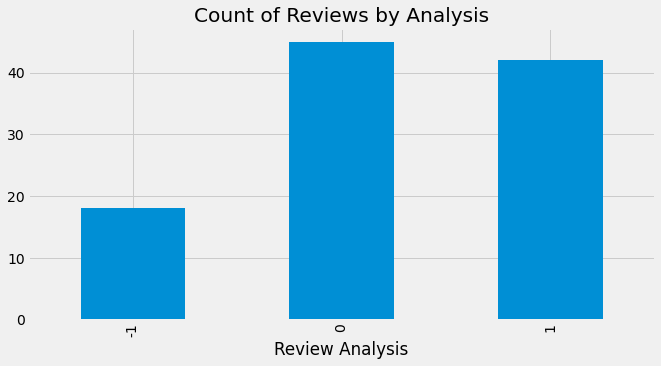

In [89]:
#the number of review analysis.
ax= new_data['Analysis'].value_counts().sort_index().plot(kind='bar', title= 'Count of Reviews by Analysis', figsize=(10,5,))
ax.set_xlabel('Review Analysis')
plt.show()


In [90]:

words= new_data['Reviews'][12]
print(words)

I got better deal, good customer satisfaction 


PREPROCESSING

TOKENIZATION

In [91]:
#breaking down the words into simpler form.
porter = PorterStemmer()
def tokenizer(words):#breaking down the text with the tokenizer
    return words.split()

def tokenizer_porter(words):
    return[porter.stem(words)for words in words.split()]
# tokens= nltk.word_tokenize(words)
# tokens

In [92]:
#break the sentence into smaller words
tokenizer('I got better deal, good customer satisfaction')

['I', 'got', 'better', 'deal,', 'good', 'customer', 'satisfaction']

In [93]:
tokenizer_porter('I got better deal, good customer satisfaction')

['i', 'got', 'better', 'deal,', 'good', 'custom', 'satisfact']

FREQUENCY. This helps to understand how many words has occurred in tbe text

In [94]:
# finding the frequency distinct in the tokens
from nltk.probability import FreqDist
fdist = FreqDist(words)
fdist


FreqDist({' ': 7, 't': 6, 'o': 5, 'e': 4, 'a': 3, 's': 3, 'g': 2, 'r': 2, 'd': 2, 'c': 2, ...})

PART OF SPEECH. This is using the nltk to assign parts of speech to each group of words

In [95]:
#the part of speech for the tokens
#each of the words have been given their part of speech
tokens= nltk.word_tokenize(words)
tagged= nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('got', 'VBD'),
 ('better', 'RBR'),
 ('deal', 'NN'),
 (',', ','),
 ('good', 'JJ'),
 ('customer', 'NN'),
 ('satisfaction', 'NN')]

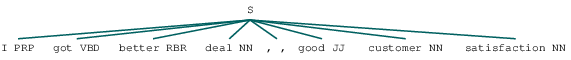

In [96]:

text = words
#importing chunk library from nltk
token = word_tokenize(text)
tags = nltk.pos_tag(token)
pos = ne_chunk(tags)
pos
#made use of ghostscripts for graphics

CHUNK. This is grouping each individual words into bigger entities

In [97]:
entities= nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  got/VBD
  better/RBR
  deal/NN
  ,/,
  good/JJ
  customer/NN
  satisfaction/NN)


STOPWORDS. These are words that do not have any meaning in a text. Words like 'the', 'is', 'a'

In [98]:
stop= stopwords.words('english')
[words for words  in tokenizer_porter('I got better deal, good customer satisfaction')[-10: ]
if words not in stop]


['got', 'better', 'deal,', 'good', 'custom', 'satisfact']

VADER MODEL
Vader stands for Valance Aware Dictionary and Sentiment Reasoner.

In [99]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm #used for doing some loops
import nltk
nltk.download('vader_lexicon')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia= SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nudou\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [100]:

#running the polarity score on the entire dataset
result = {}#a dictionary that would store in the polarity score of the reviews
for i, row in tqdm(new_data.iterrows(), total=len(new_data)):
        text = row['Reviews']
        my_id = row['Id']
        result[my_id] = sia.polarity_scores(text)


  0%|          | 0/105 [00:00<?, ?it/s]

In [101]:
result

{1: {'neg': 0.0, 'neu': 0.484, 'pos': 0.516, 'compound': 0.4939},
 2: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 3: {'neg': 0.0, 'neu': 0.357, 'pos': 0.643, 'compound': 0.8689},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 6: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 7: {'neg': 0.434, 'neu': 0.566, 'pos': 0.0, 'compound': -0.3182},
 8: {'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.6369},
 9: {'neg': 0.0, 'neu': 0.463, 'pos': 0.537, 'compound': 0.7003},
 10: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 11: {'neg': 0.0, 'neu': 0.455, 'pos': 0.545, 'compound': 0.5574},
 12: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 13: {'neg': 0.0, 'neu': 0.315, 'pos': 0.685, 'compound': 0.8271},
 14: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 15: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 16: {'neg': 0.0, 'neu': 0.377, 'pos': 0.623, 'compound': 0

In [102]:
#turnning into a dataframe and merging to the tables
vader=pd.DataFrame(result).T
vader

,neg,neu,pos,compound
1,0.000,0.484,0.516,0.4939
2,0.000,1.000,0.000,0.0000
3,0.000,0.357,0.643,0.8689
4,0.000,1.000,0.000,0.0000
5,0.000,1.000,0.000,0.0000
...,...,...,...,...
101,0.000,1.000,0.000,0.0000
102,0.000,1.000,0.000,0.0000
103,0.636,0.364,0.000,-0.5423
104,0.000,1.000,0.000,0.0000


TESTING THE VADER MODEL

In [103]:
words= new_data['Reviews'][41]
print(words)
sia.polarity_scores(words)

Facing network issues, mobile data connectivity issues


{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [104]:
words= "I deiike the EE network because it is so expensive"
sia.polarity_scores(words)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [105]:

# function to print sentiments of the sentence.
def sentiment_scores(Reviews):
# Creating a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
# polarity_scores method of SentimentIntensityAnalyzer
# object giving  a sentiment dictionary which contains positive, negative, neutral, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(Reviews)
    print("Overall Review dictionary is : ", sentiment_dict)
    print("Review was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("Review was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("Review was rated as ", sentiment_dict['pos']*100, "% Positive")
    print("Review Overall Rated As", end = " ")
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
    else :
        print("Neutral")


In [106]:

from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
tokenizer= AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment", problem_type= 'multi_label_classification')
#model was in a tensor
encoded_text= tokenizer(words, return_tensors="pt")
output= model(**encoded_text)
#changing it from a tensor to a numpy
scores= output[0][0].detach().numpy()
scores= softmax(scores)
scores_dict = {'roberta_neg': scores[0],
               'roberta_pos': scores[1],
               'roberta_neu': scores[2]
}
print(scores_dict)


{'roberta_neg': 0.8980253, 'roberta_pos': 0.09120331, 'roberta_neu': 0.01077144}


In [107]:
#Vader Analysis
print("Text Selected for VADER Sentimental Analysis :")
Reviews1 = words
print(Reviews1)
sentiment_scores(Reviews1)

Text Selected for VADER Sentimental Analysis :
I deiike the EE network because it is so expensive
Overall Review dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Review was rated as  0.0 % Negative
Review was rated as  100.0 % Neutral
Review was rated as  0.0 % Positive
Review Overall Rated As Neutral


Roberta Model


In [108]:
roberta_result = {}#a dictionary that would store in the polarity score of the reviews
for i, row in tqdm(new_data.iterrows(), total=len(new_data)):
        text = row['Reviews']
        my_id = row['Id']
        roberta_result[my_id] = scores_dict

  0%|          | 0/105 [00:00<?, ?it/s]

In [109]:
roberta_result

{1: {'roberta_neg': 0.8980253,
  'roberta_pos': 0.09120331,
  'roberta_neu': 0.01077144},
 2: {'roberta_neg': 0.8980253,
  'roberta_pos': 0.09120331,
  'roberta_neu': 0.01077144},
 3: {'roberta_neg': 0.8980253,
  'roberta_pos': 0.09120331,
  'roberta_neu': 0.01077144},
 4: {'roberta_neg': 0.8980253,
  'roberta_pos': 0.09120331,
  'roberta_neu': 0.01077144},
 5: {'roberta_neg': 0.8980253,
  'roberta_pos': 0.09120331,
  'roberta_neu': 0.01077144},
 6: {'roberta_neg': 0.8980253,
  'roberta_pos': 0.09120331,
  'roberta_neu': 0.01077144},
 7: {'roberta_neg': 0.8980253,
  'roberta_pos': 0.09120331,
  'roberta_neu': 0.01077144},
 8: {'roberta_neg': 0.8980253,
  'roberta_pos': 0.09120331,
  'roberta_neu': 0.01077144},
 9: {'roberta_neg': 0.8980253,
  'roberta_pos': 0.09120331,
  'roberta_neu': 0.01077144},
 10: {'roberta_neg': 0.8980253,
  'roberta_pos': 0.09120331,
  'roberta_neu': 0.01077144},
 11: {'roberta_neg': 0.8980253,
  'roberta_pos': 0.09120331,
  'roberta_neu': 0.01077144},
 12: {'r

In [110]:
roberta_result=pd.DataFrame(roberta_result).T
roberta_result

,roberta_neg,roberta_pos,roberta_neu
1,0.898025,0.091203,0.010771
2,0.898025,0.091203,0.010771
3,0.898025,0.091203,0.010771
4,0.898025,0.091203,0.010771
5,0.898025,0.091203,0.010771
...,...,...,...
101,0.898025,0.091203,0.010771
102,0.898025,0.091203,0.010771
103,0.898025,0.091203,0.010771
104,0.898025,0.091203,0.010771


Comaparing the Model

In [111]:
result = {}#a dictionary that would store in the polarity score of the reviews
for i, row in tqdm(new_data.iterrows(), total=len(new_data)):
        text = row['Reviews']
        my_id = row['NetworkService']
        result[my_id] = sia.polarity_scores(text)

  0%|          | 0/105 [00:00<?, ?it/s]

In [112]:
def polarity_scores_roberta(Reviews):
    encoded_text= tokenizer(Reviews, return_tensors="pt")
    output= model(**encoded_text)
#changing it from a tensor to a numpy
    scores= output[0][0].detach().numpy()
    scores= softmax(scores)
    scores_dict = {'roberta_neg': scores[0],
               'roberta_pos': scores[1],
               'roberta_neu': scores[2]
                   }
    return  scores_dict

In [113]:
def sentiment_scores(Reviews):
# Creating a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
# polarity_scores method of SentimentIntensityAnalyzer
# object gives a sentiment dictionary which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(Reviews)
    print("Overall Review dictionary is : ", sentiment_dict)
    print("Vader Review was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("Vader Review was rated as ", sentiment_dict['neu']*100, "% Neutral")
    print("Vader Review was rated as ", sentiment_dict['pos']*100, "% Positive")
    print("Vader Review Overall Rated As", end = " ")
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        print("Positive")
    elif sentiment_dict['compound'] <= - 0.05 :
        print("Negative")
    else :
        print("Neutral")

def polarity_scores_roberta(Reviews):
    encoded_text= tokenizer(Reviews, return_tensors="pt")
    output= model(**encoded_text)
    scores= output[0][0].detach().numpy()
    scores= softmax(scores)
    compound = 0 #Todo You have to calculate the actual value of compound. it is set to zero just to make the error go away
    scores_dict = {'roberta_neg': scores[0],
               'roberta_pos': scores[1],
               'roberta_neu': scores[2],
                   }
#changing it from a tensor to a numpy
    #sentiment_dict = sid_obj.polarity_scores(Reviews)
    print("Overall Review dictionary is : ", scores_dict)
    print("Roberta Review was rated as",  scores_dict['roberta_neg']*100,"% Negative")
    print("Roberta Review was rated as",  scores_dict['roberta_neu']*100,"% Neutral")
    print("Roberta Review was rated as",  scores_dict['roberta_pos']*100,"% Positive")
    # decide sentiment as positive, negative and neutral



In [114]:
#Vader Analysis
print("Text Selected for VADER Sentimental Analysis :")
Reviews1 = words
print(Reviews1)
sentiment_scores(Reviews1)


Text Selected for VADER Sentimental Analysis :
I deiike the EE network because it is so expensive
Overall Review dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Vader Review was rated as  0.0 % Negative
Vader Review was rated as  100.0 % Neutral
Vader Review was rated as  0.0 % Positive
Vader Review Overall Rated As Neutral
Text Selected for Roberta  Sentimental Analysis :
I deiike the EE network because it is so expensive
Overall Review dictionary is :  {'roberta_neg': 0.8980253, 'roberta_pos': 0.09120331, 'roberta_neu': 0.01077144}
Roberta Review was rated as 89.80252742767334 % Negative
Roberta Review was rated as 1.0771440342068672 % Neutral
Roberta Review was rated as 9.120330959558487 % Positive


In [115]:
from transformers import pipeline
sentiment_pipe = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [116]:
sentiment_pipe(" I deiike the EE network because it is so expensive ")

[{'label': 'NEGATIVE', 'score': 0.9991160035133362}]

In [117]:
sentiment_pipe(' The Giffgaff network is fast, affordable and has a good netwrok coverage')

[{'label': 'POSITIVE', 'score': 0.9994534850120544}]

In [118]:
sentiment_pipe("I have got a better deal, good customer satisfaction")

[{'label': 'POSITIVE', 'score': 0.9970880150794983}]

In [119]:
sentiment_pipe("Facing netrwork issues, mibile connectivity issue")

[{'label': 'NEGATIVE', 'score': 0.99566650390625}]

#Aspect based

In [4]:
import aspect_based_sentiment_analysis

import spacy
nlp = spacy.load("en_core_web_sm")
from textblob import  TextBlob


In [6]:
#opinion= "I deiike the EE network because it is so expensive"
opinion= TextBlob("Facing Network issues,mobile data connectivity issues ")
opinion.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [186]:


reviews = [
    'I know for a fact that EE Network is costly',
    'The Vodafone Network does not have enough network coverage in remote areas. It is money-focused',
    'I love the Connectivity, network strength, internet Cheap bundles',
    'It has a High data tariff which makes it expensive',
    'The smart Network has an Indiscriminate charges, it is cheap,  low internet coverage across the UK and High international call charges',
    'The Lebara network is affordable and fast than the EE network'
]

In [187]:
sentences = [
  'The food we had yesterday was delicious',
  'My time in Italy was very enjoyable',
  'I found the meal to be tasty',
  'The internet was slow.',
  'Our experience was suboptimal'
]

In [190]:
aspects = []
for sentence in reviews:
  doc = nlp(sentence)
  descriptive_term = ''
  target = ''
  for token in doc:
    if token.dep_ == 'nsubj' and token.pos_ == 'NOUN':
      target = token.text
    if token.pos_ == 'ADJ':
      prepend = ''
      for child in token.children:
        if child.pos_ != 'ADV':
          continue
        prepend += child.text + ' '
      descriptive_term = prepend + token.text
  aspects.append({'aspect': target,
    'description': descriptive_term})
print(aspects)

[{'aspect': '', 'description': 'costly'}, {'aspect': '', 'description': 'remote'}, {'aspect': '', 'description': 'Cheap'}, {'aspect': '', 'description': 'expensive'}, {'aspect': '', 'description': 'international'}, {'aspect': 'network', 'description': 'fast'}]


In [ ]:
import aspect_based_sentiment_analysis as absa